# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [2]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

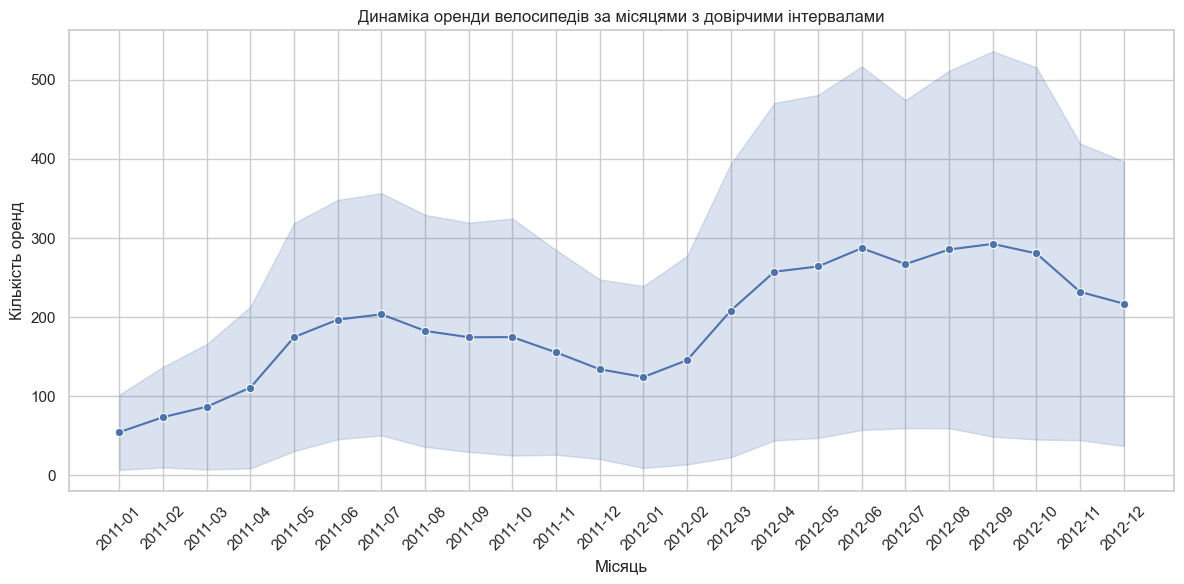

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month_year', y='count', errorbar='sd', marker='o')
plt.title('Динаміка оренди велосипедів за місяцями з довірчими інтервалами')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренд')
plt.xticks(rotation=45)
plt.tight_layout();

Найбільша невизначеність в даних спостерігається в літні місяці 2012 року (приблизно травень–вересень), де довірчий інтервал є найширшим. Це свідчить про значний розкид значень кількості оренд і нестабільність попиту.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

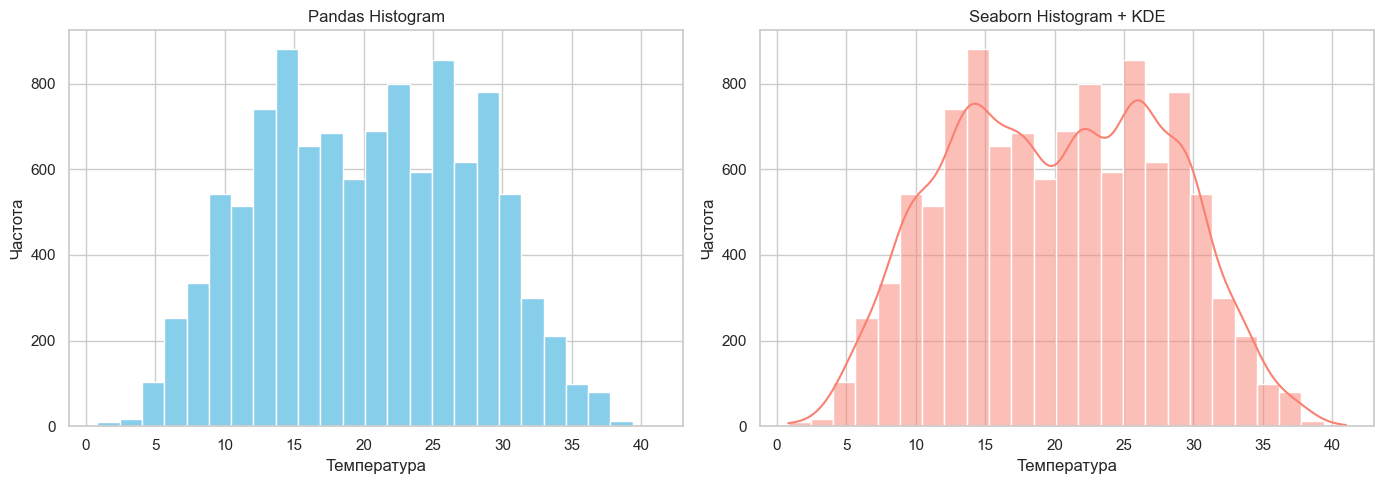

In [12]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
df['temp'].plot(
    kind='hist',
    bins=25,
    color='skyblue',
)
plt.title('Pandas Histogram')
plt.xlabel('Температура')
plt.ylabel('Частота')


plt.subplot(1, 2, 2)
sns.histplot(
    data=df,
    x='temp',
    bins=25,
    kde=True,
    color='salmon'
)
plt.title('Seaborn Histogram + KDE')
plt.xlabel('Температура')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

1. Візуалізація Pandas є простішою та відображає лише частоту значень у кожному інтервалі. Гістограма Seaborn виглядає більш інформативною та естетичною, оскільки має сучасний стиль оформлення і додатково може показувати згладжену оцінку розподілу даних.

2. Додаткова лінія - це крива щільності (KDE, Kernel Density Estimate). Вона показує згладжену форму розподілу даних і дозволяє оцінити, де значення зустрічаються найчастіше. Тобто, можна сказати, що це "гладка версія гістограми", без різких переходів між інтервалами.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

In [15]:
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
df['weather_label'] = df['weather'].map(weather_labels)

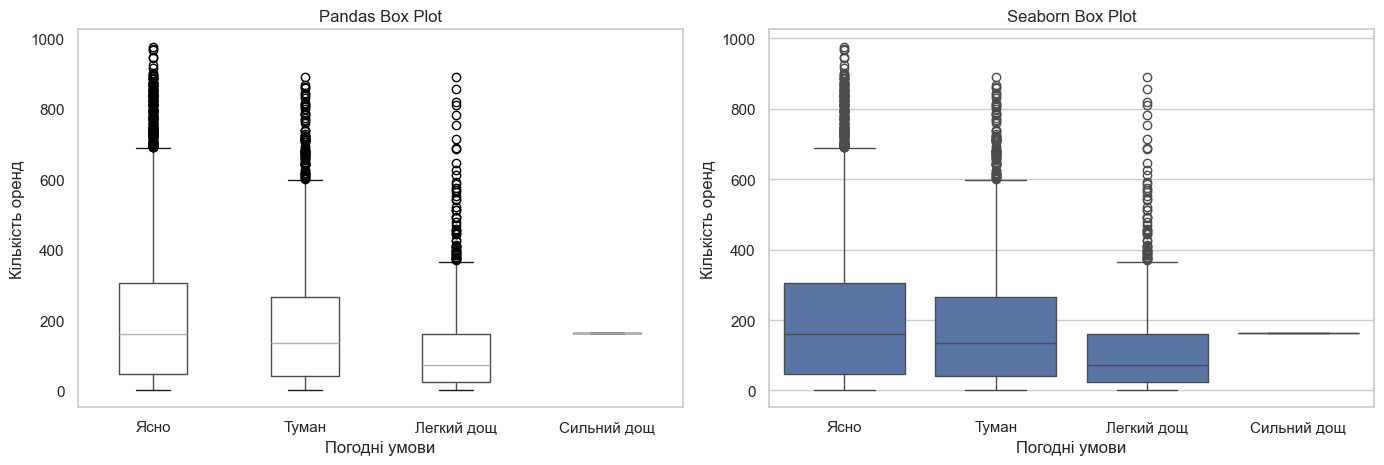

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df.boxplot(column='count', by='weather_label', grid=False, ax=axes[0])
axes[0].set_title('Pandas Box Plot')
axes[0].set_xlabel('Погодні умови')
axes[0].set_ylabel('Кількість оренд')
fig.suptitle('')

sns.boxplot(data=df, x='weather_label', y='count', ax=axes[1])
axes[1].set_title('Seaborn Box Plot')
axes[1].set_xlabel('Погодні умови')
axes[1].set_ylabel('Кількість оренд')
plt.tight_layout()
plt.show()

Pandas бокс-плот має простий базовий вигляд: не забарвлені коробки, мінімум дизайну. Бокс-плот Seaborn виглядає сучасніше: кольорові коробки з чіткими контурами роблять графік більш зрозумілим і зручним для аналізу.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


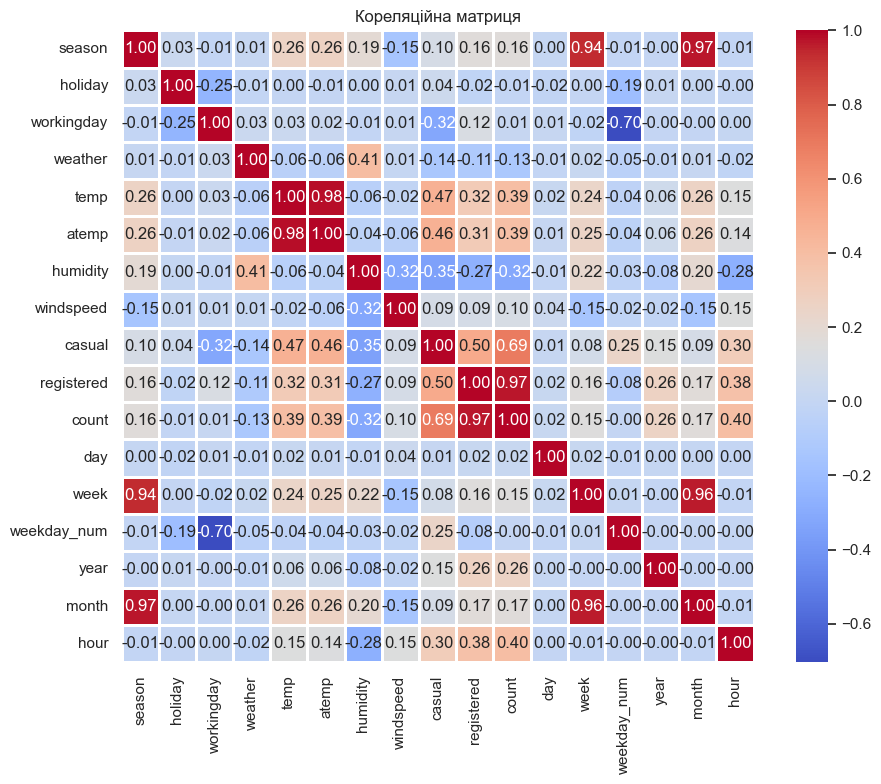

In [32]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    square=True,
    linewidths=1
)
plt.title('Кореляційна матриця')
plt.tight_layout()
plt.show()

1. Найсильнішу позитивну кореляцію із загальною кількістю оренд (count) мають змінні registered та casual, тому що вони безпосередньо формують загальну кількість користувачів.

2. Між temp та atemp спостерігається дуже сильна позитивна кореляція (0.98), оскільки відчутна температура розраховується на основі фактичної температури повітря та ін. пов’язаних з нею факторів.

3. Негативну кореляцію з кількістю оренд мають показники вологості та погодних умов, що свідчить про зменшення попиту на велосипеди за несприятливої погоди. В цілому, негативну кореляцію між змінними мають, зокрема, workingday і weekday_num (сильна зворотна залежність), а також humidity і casual (висока вологість - менше випадкових користувачів).

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за кварталами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому кварталі найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


In [33]:
season_labels = {
    1: 'Q1',
    2: 'Q2',
    3: 'Q3',
    4: 'Q4'
}
df['season_label'] = df['season'].map(season_labels)

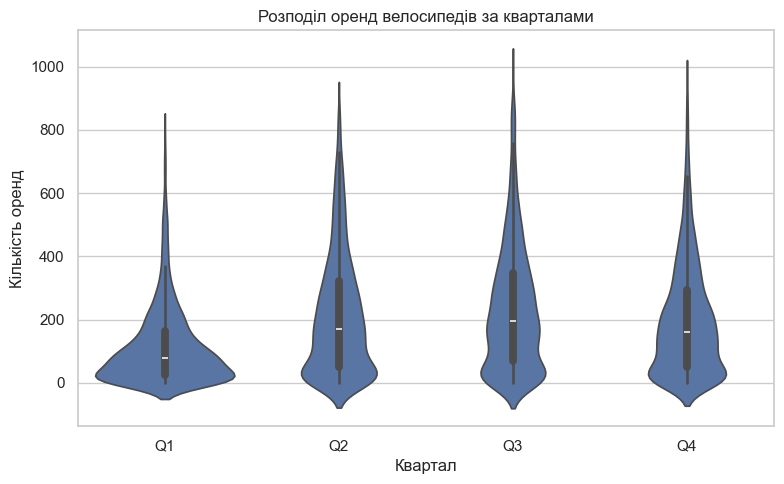

In [38]:
plt.figure(figsize=(8, 5))
sns.violinplot(
    data=df,
    x='season_label',
    y='count'
)
plt.title('Розподіл оренд велосипедів за кварталами')
plt.xlabel('Квартал')
plt.ylabel('Кількість оренд')
plt.tight_layout()
plt.show()

1. Товщина violin plot відображає щільність розподілу даних: чим ширша частина графіка, тим більше спостережень у цьому діапазоні.

2. Найбільша варіабельність оренд спостерігається у третьому кварталі (Q3), де розподіл значень є найширшим і охоплює найбільший діапазон кількості оренд.

3. Перевага violin plot полягає в тому, що він відображає не тільки основні статистичні показники (як box plot), а й форму розподілу даних, що дозволяє краще оцінити щільність, асиметрію та наявність кількох піків.

## Завдання 6 : Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте season (квартал).

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше відрізняється між кварталами?

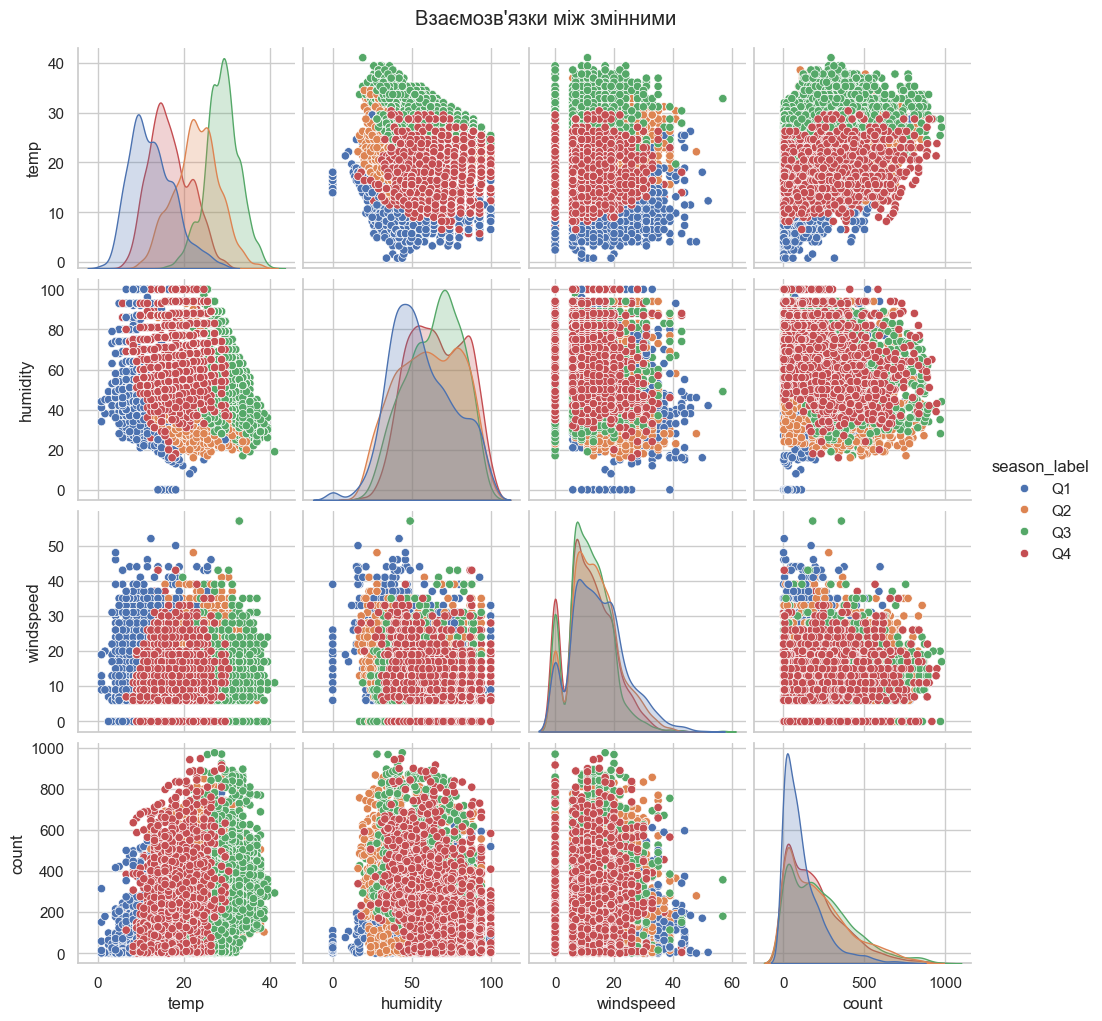

In [53]:
sns.pairplot(
    df[['temp', 'humidity', 'windspeed', 'count', 'season_label']],
    hue='season_label'
)
plt.suptitle('Взаємозв\'язки між змінними', y=1.02)
plt.show()

1. Найсильніший лінійний зв’язок спостерігається між температурою повітря (temp) та кількістю оренд (count): зі зростанням температури попит на оренду велосипедів збільшується.

2. Найбільше між кварталами відрізняється температура (temp), тому що кожен квартал відповідає певній порі року з характерним їй температурним режимом.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

In [57]:
workingday_labels = {
    0: 'Вихідний/свято',
    1: 'Робочий день'
}
df['workingday_label'] = df['workingday'].map(workingday_labels)

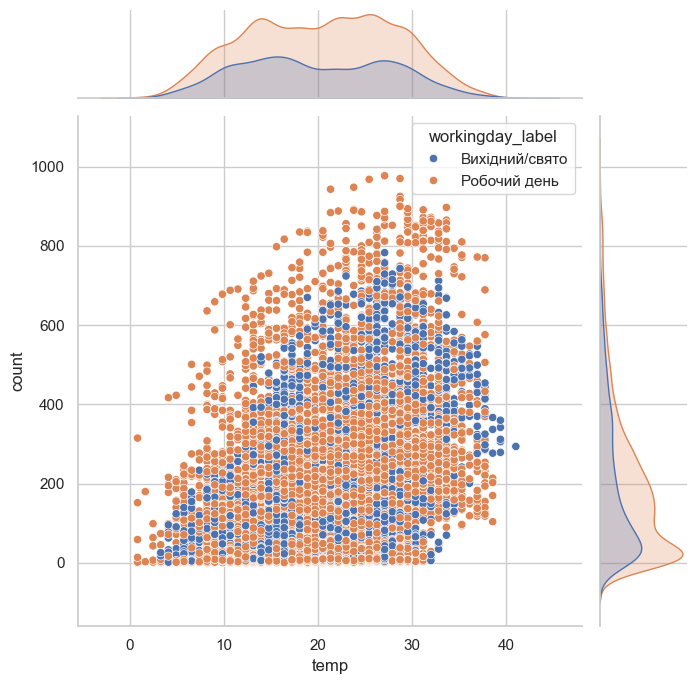

In [61]:
sns.jointplot(
    data=df,
    x='temp',
    y='count',
    hue='workingday_label',
    height=7
)
plt.show()

1. Графіки по краях показують, як розподілені значення температури (зверху) і кількості оренд (справа), тобто які значення трапляються найчастіше та як вони відрізняються між групами.

2. Так, у робочі дні спостерігається вища кількість оренд, що пов’язано з використанням велосипедів для поїздок на роботу. У вихідні та святкові дні попит нижчий.